# Follow the Snake Challenge from https://data-puzzles.com/challenges/follow-the-snake/

Let's get the data from our github repo. The data relevant for this challenge is in the folder `data-puzzles-assets/computervision/snakes/`



In [1]:
!git clone https://github.com/hyperc54/data-puzzles-assets.git

fatal: destination path 'data-puzzles-assets' already exists and is not an empty directory.


In [2]:
CHALLENGE_DIR = '/content/data-puzzles-assets/computervision/snakes/'

In [3]:
!ls $CHALLENGE_DIR | head -n5

follow-the-snake-001.png
follow-the-snake-002.png
follow-the-snake-003.png
follow-the-snake-004.png
follow-the-snake-005.png


Will you find the name of the snake?

In [4]:
!pip install opencv-python

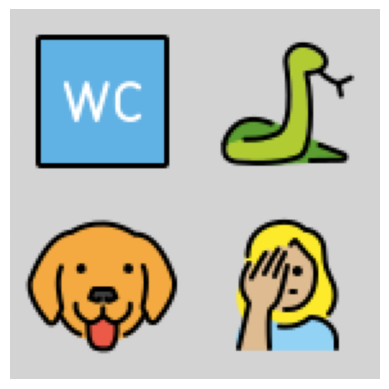

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

#Exploring the pictures
img = mpimg.imread(CHALLENGE_DIR + "follow-the-snake-203.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
!ls $CHALLENGE_DIR | tail -n1

follow-the-snake-508.png


In [7]:
image_path = CHALLENGE_DIR + "follow-the-snake-001.png"

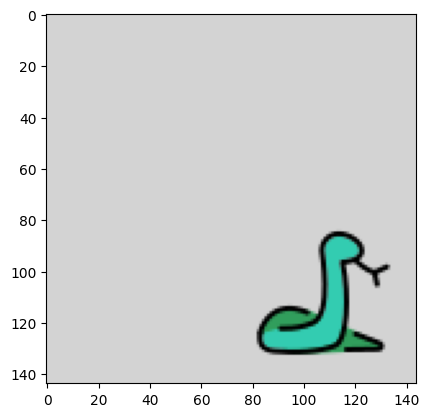

In [8]:
imaging = cv2.imread(image_path)
plt.imshow(imaging)

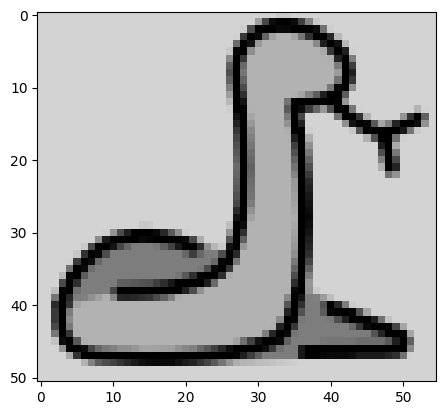

In [9]:
#Creating a template

imaging = cv2.imread(image_path,0)
cropped_image = imaging[84:135, 80:135]

template = cropped_image.copy()

plt.imshow(template,cmap='gray', vmin=0, vmax=255)

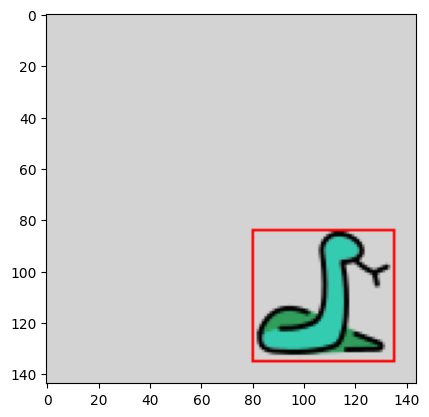

In [10]:
#First go at matchTemplating

img = cv2.imread(CHALLENGE_DIR + "follow-the-snake-013.png")
gray = cv2.imread(CHALLENGE_DIR + "follow-the-snake-013.png",0)

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]#, cv2.TM_CCORR, cv2.TM_CCORR_NORMED]

h,w = template.shape

for method in methods:
  result = cv2.matchTemplate(gray, template, method)

  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

  loc = max_loc

  bottom_right = (loc[0]+w,loc[1]+h)
  cv2.rectangle(img,loc, bottom_right,255,1)

plt.imshow(img,cmap='gray', vmin=0, vmax=255)


In [11]:
#Function to output the location of the snake
def template_search(image, template):

  methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]#, cv2.TM_CCORR, cv2.TM_CCORR_NORMED]

  for method in methods:
    img = image.copy()

    result = cv2.matchTemplate(img, template, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    return max_loc

#Function to turn matchTemplate coordinate into the direction
def sector_translate(coords):
  i,j = coords[1], coords[0]

  if (i < 70 and j < 70): #top left
    return "N"
  if (i > 70 and j < 70): #top right
    return "W"
  if (i < 70 and j > 70):
    return "S"
  if ( i > 70 and j > 70):
    return "E"

Result : W


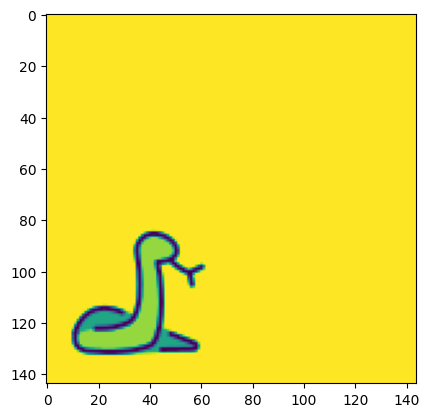

In [12]:
#Testing the functions
img = cv2.imread(CHALLENGE_DIR + "follow-the-snake-014.png",0)
template = template

coords = template_search(img,template)

plt.imshow(img)

print("Result : " + sector_translate(coords))

In [13]:
#Looping through all the images and collecting the directional data of the snakes using the functions above.

name = ""
for i in range(1,509,1):

  num = str(i)

  while len(num)<3:
    num = "0" + num

  image_path = image_path = CHALLENGE_DIR + "follow-the-snake-" + num + ".png"
  image = cv2.imread(image_path,0)

  cords = template_search(image, template)

  letter = sector_translate(cords)

  name += letter

print(name)

ENNNNNNNNEEEEWWWWSSSSSSSSEEEEENNNNNNNNEEEESSSSWWWWEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSEEEEENNNNWWWWNNNNEEEEWWWWSSSSEEEESSSSENNNNNNNNEEEEWWWWSSSSSSSSEEEEENNNNNNNNEEEESSSSWWWWEEEESSSSENNNNNNNNEEEESSSSWWWWEEEESSSSWWWWEEEEENNNNNNNNEEEEWWWWSSSSEEEEWWWWSSSSEEEEENNNNNNNNSSSSSSSSEEEEE


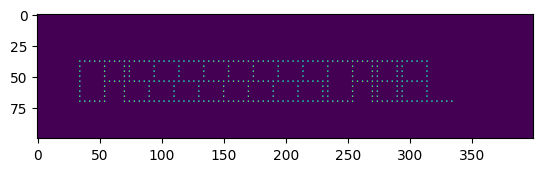

In [14]:
#Using the directions to draw out the snakes name
canvas = np.zeros(shape=(100,400))
line = 4
y, x = 70, 30

for letter in name:
  if letter == "N":
    y-=line
  if letter == "E":
    x+=line
  if letter == "S":
    y+=line
  if letter == "W":
    x-=line
  canvas[y,x] = 100

plt.imshow(canvas)

ANSWER : CASSSSSSSSCABEL